## 이런 느낌?

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
# pd.options.display.max_columns = None
df = pd.read_csv('./레이블합친최종본.csv',encoding='cp949')
df = df.replace(1254789.63,np.nan)
df['회생기업1'] = df['회생기업1'].fillna(0)
df['회생기업2'] = df['회생기업2'].fillna(0)
df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d-%m')
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,R & D 투자효율,통계청 한국표준산업분류 10차(소분류),매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,CMG제약,58820,2011-12,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,0.13,의약품 제조업,1,0,0,0,0,0,0,0
1,CMG제약,58820,2012-12,-7.75,109.15,-4.12,207.08,75.17,-8.43,28.34,...,0.74,의약품 제조업,0,0,0,0,1,1,0,0
2,CMG제약,58820,2013-12,0.70,-2.09,16.09,-18.89,55.10,25.51,38.70,...,0.66,의약품 제조업,0,0,0,0,0,0,0,0
3,CMG제약,58820,2014-12,3.60,3.86,74.30,-25.93,0.01,11.52,37.07,...,0.51,의약품 제조업,0,0,0,1,0,0,0,0
4,CMG제약,58820,2015-12,-32.22,-2.64,-5.37,-7.17,-4.48,18.85,36.26,...,3.08,의약품 제조업,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,흥아해운,3280,2014-12,1.12,13.69,45.19,-13.68,7.76,7.17,5.61,...,0.00,해상 운송업,0,0,0,0,0,0,0,0
8788,흥아해운,3280,2015-12,1.02,21.93,49.36,-11.18,3.39,2.42,6.20,...,0.00,해상 운송업,0,0,0,0,0,0,0,0
8789,흥아해운,3280,2016-12,0.21,21.08,38.84,-25.08,11.22,-1.58,4.49,...,0.00,해상 운송업,0,1,0,0,0,1,0,0
8790,흥아해운,3280,2017-12,-0.42,-11.43,-16.50,13.29,-39.28,0.56,2.09,...,0.00,해상 운송업,0,0,0,0,0,0,0,0


In [2]:
# df.to_csv('레이블합친최종본.csv',encoding='cp949',index=False)

In [3]:
df.isna().sum()

회사명                        0
거래소코드                      0
회계년도                       0
이자보상배율                     0
총자산증가율                     5
유형자산증가율                    5
유동자산증가율                    5
자기자본증가율                    5
매출액증가율                     5
매출액총이익율                    0
매출액순이익율                    0
자기자본순이익율                   5
총자본영업이익율                   2
매출액영업이익률                   0
총자본순이익률                    5
총자본회전율                     5
재고자산회전율                  252
매출채권회전율                    5
유형자산회전율                    5
매입채무회전율                  261
자기자본회전율                    5
타인자본회전율                    5
유동자산회전율                    5
순운전자본회전율                   0
유동비율                       0
당좌비율                       0
현금비율                       0
부채비율                       0
차입금의존도                     0
CASH_FLOW_대_부채비율           0
CASH_FLOW_대_매출액비율          0
CASH_FLOW_대_차입금비율          2
자기자본구성비율                   0
당좌자산구성비율                   0
유동자산구성비율      

### 결측치 확인

<AxesSubplot:>

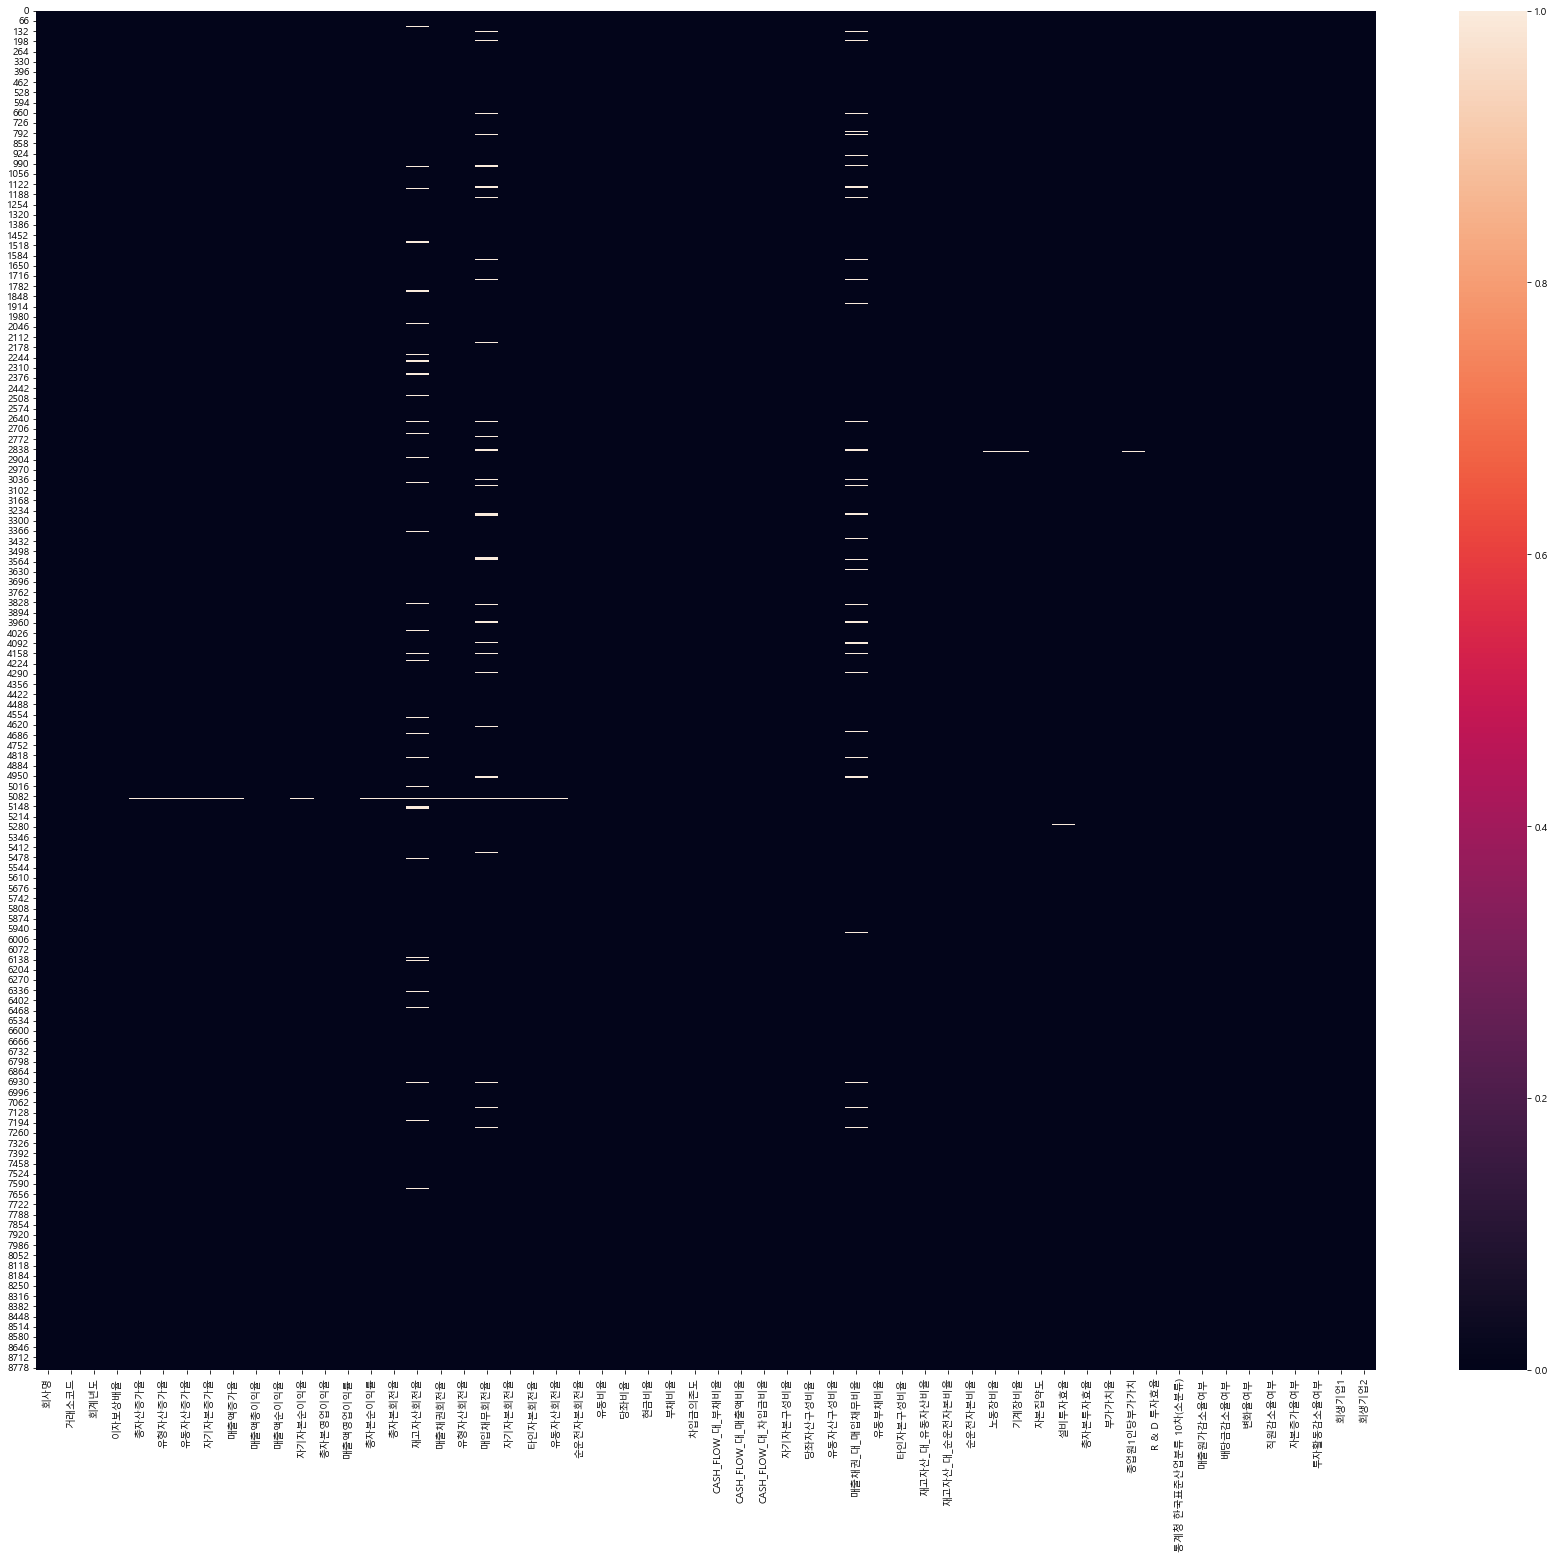

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

### 아직 결정된건 아니지만 일단 남은 결측치 평균으로 채워넣고 남는 결측치는 제거한다

In [5]:
medi = lambda x: x.fillna(x.mean())
df = df.groupby('회사명').apply(medi)
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

C:\Users\82104\AppData\Local\Temp\ipykernel_17912\1267424916.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medi = lambda x: x.fillna(x.mean())


회사명                      0
거래소코드                    0
회계년도                     0
이자보상배율                   0
총자산증가율                   0
유형자산증가율                  0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
매출액총이익율                  0
매출액순이익율                  0
자기자본순이익율                 0
총자본영업이익율                 0
매출액영업이익률                 0
총자본순이익률                  0
총자본회전율                   0
재고자산회전율                  0
매출채권회전율                  0
유형자산회전율                  0
매입채무회전율                  0
자기자본회전율                  0
타인자본회전율                  0
유동자산회전율                  0
순운전자본회전율                 0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
차입금의존도                   0
CASH_FLOW_대_부채비율         0
CASH_FLOW_대_매출액비율        0
CASH_FLOW_대_차입금비율        0
자기자본구성비율                 0
당좌자산구성비율                 0
유동자산구성비율                 0
매출채권_대_매입채무비율            0
유동부채비율                   0
타

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592 entries, 0 to 8591
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   회사명                    8592 non-null   object 
 1   거래소코드                  8592 non-null   int64  
 2   회계년도                   8592 non-null   object 
 3   이자보상배율                 8592 non-null   float64
 4   총자산증가율                 8592 non-null   float64
 5   유형자산증가율                8592 non-null   float64
 6   유동자산증가율                8592 non-null   float64
 7   자기자본증가율                8592 non-null   float64
 8   매출액증가율                 8592 non-null   float64
 9   매출액총이익율                8592 non-null   float64
 10  매출액순이익율                8592 non-null   float64
 11  자기자본순이익율               8592 non-null   float64
 12  총자본영업이익율               8592 non-null   float64
 13  매출액영업이익률               8592 non-null   float64
 14  총자본순이익률                8592 non-null   float64
 15  총자본회

In [7]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

### 아상치 확인

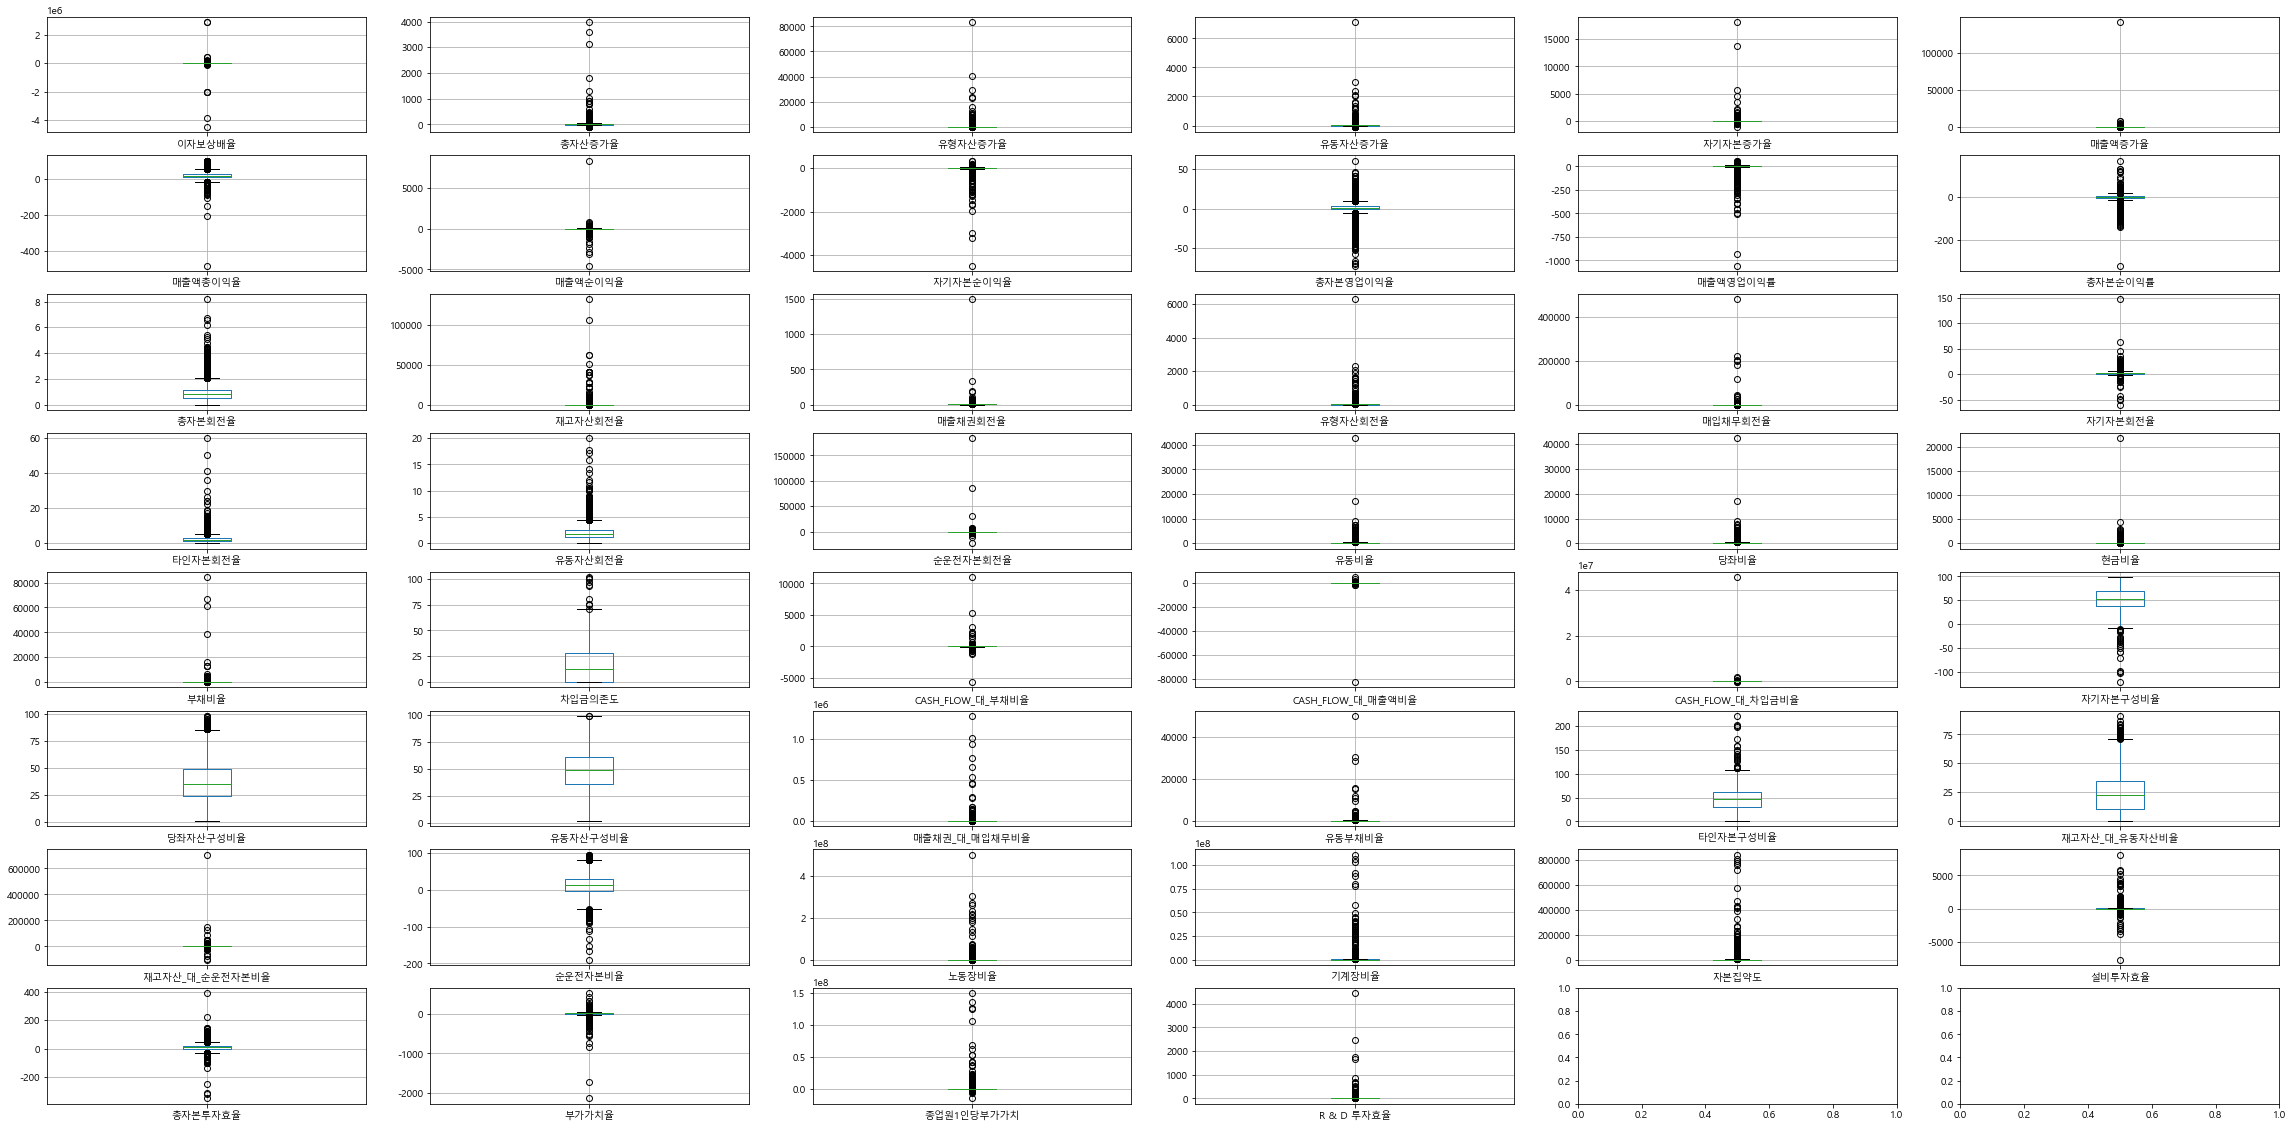

In [8]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df.boxplot(column='R & D 투자효율', ax=axes[7,3])

plt.show()

In [9]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

### 이상치 조정

In [10]:
from scipy.stats.mstats import winsorize
df1 = df.copy()
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

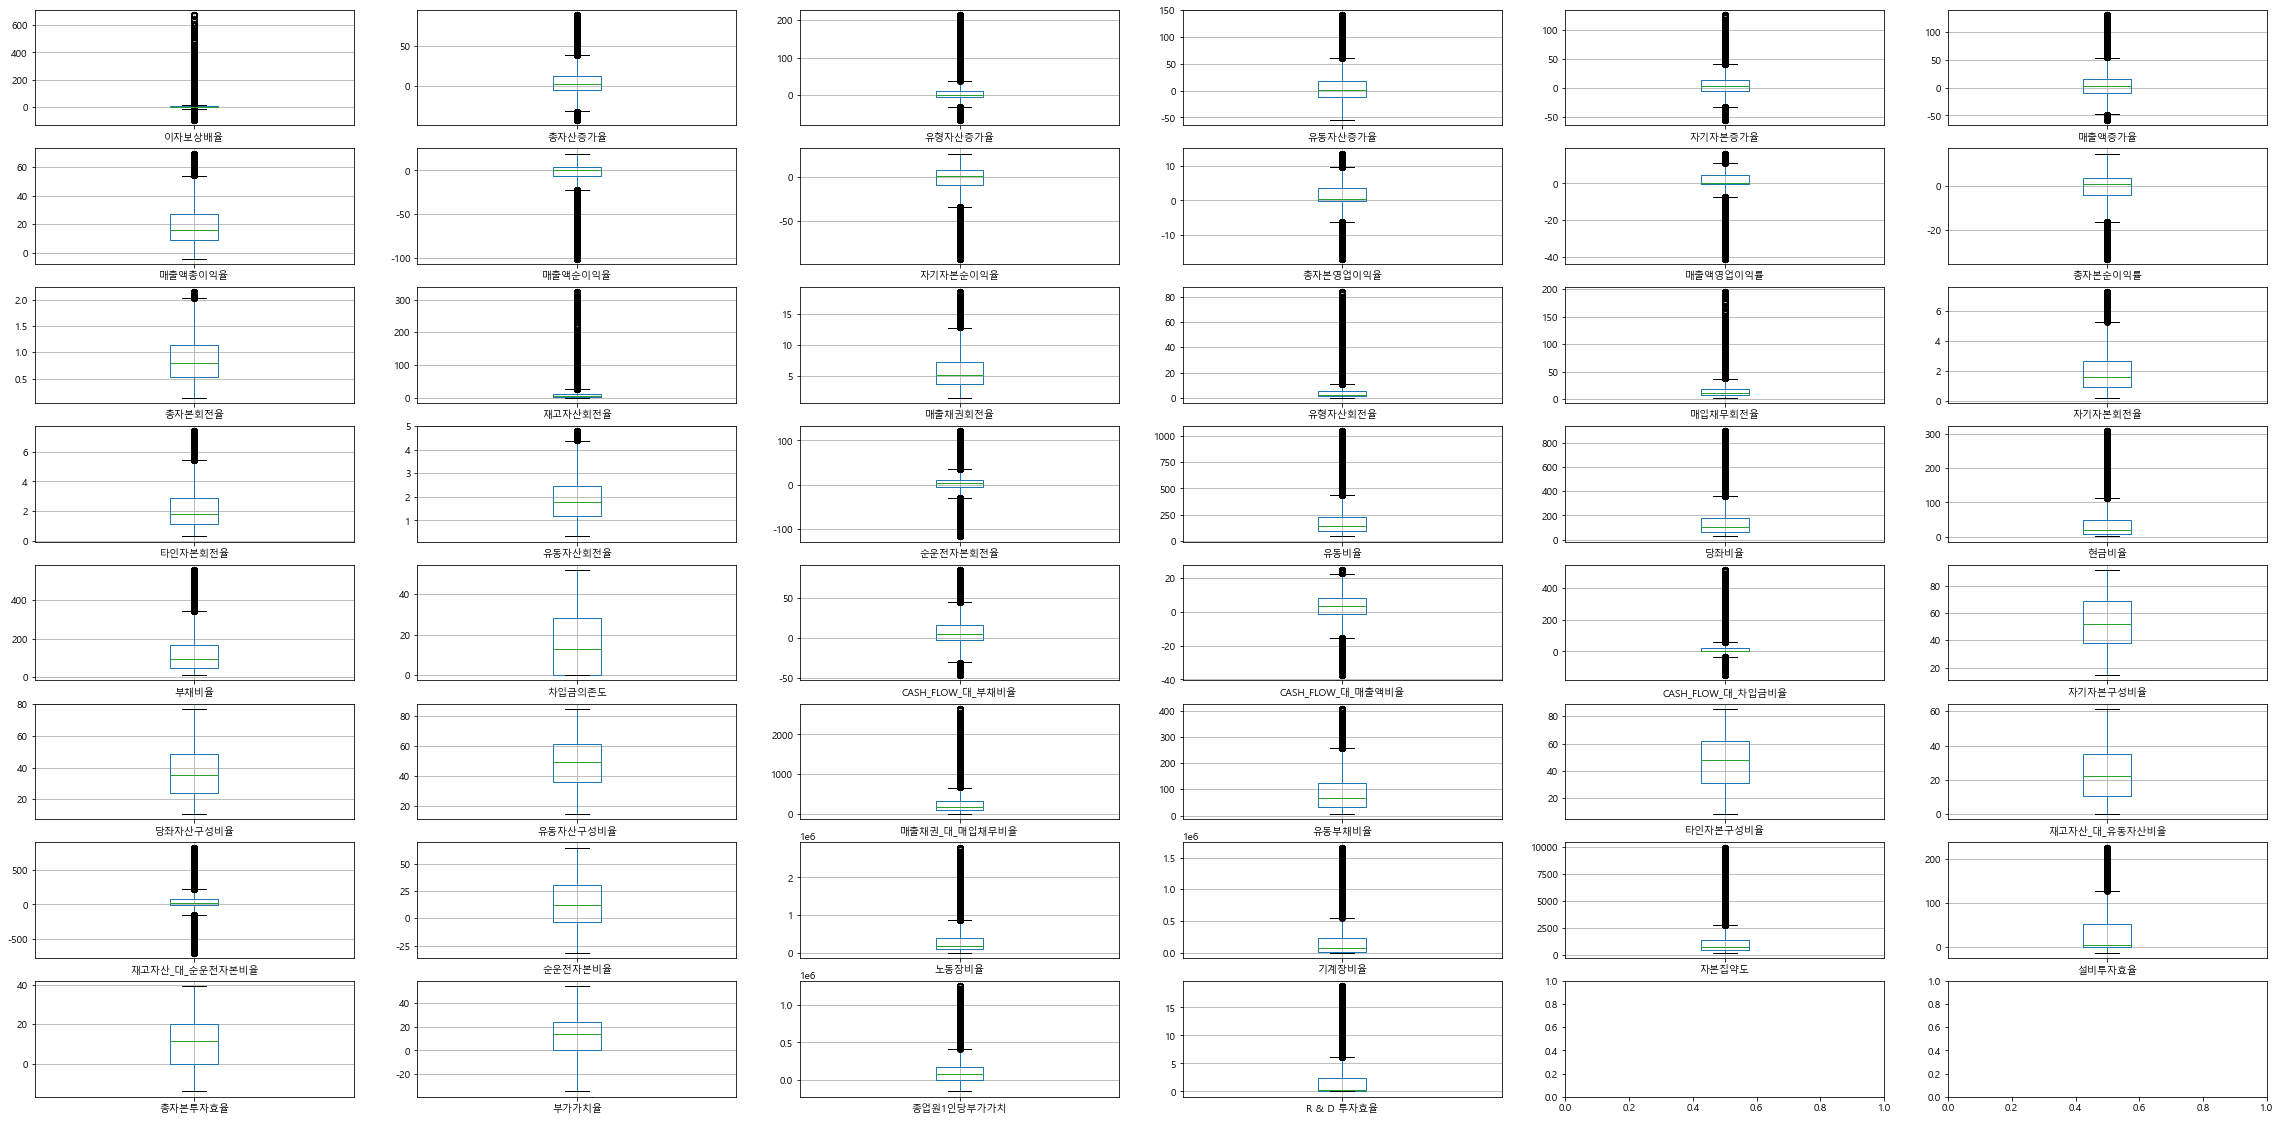

In [11]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df1.boxplot(column='R & D 투자효율', ax=axes[7,3])

plt.show()

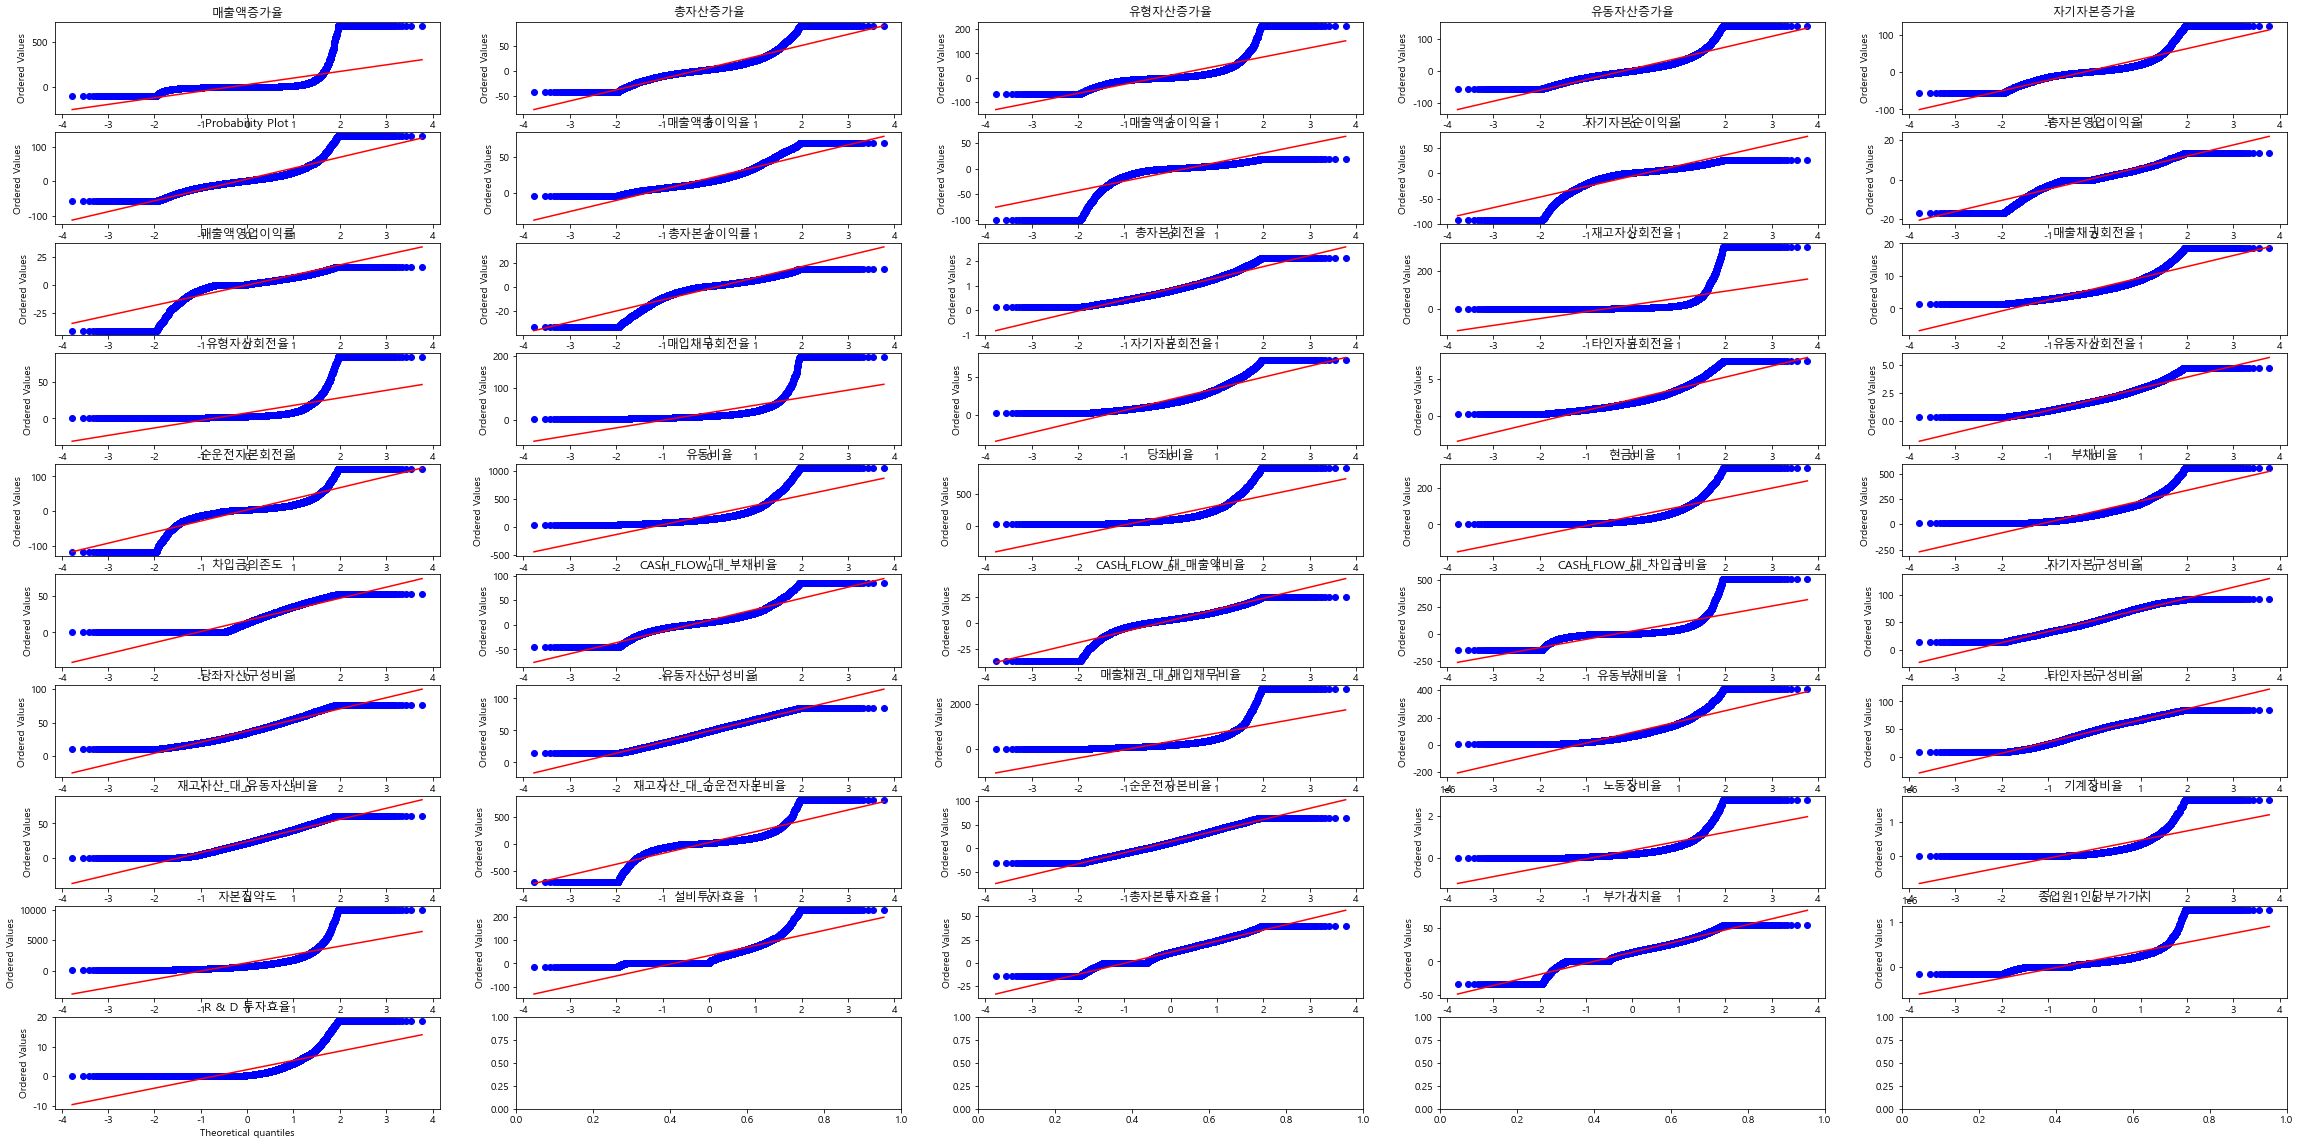

In [12]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")
stats.probplot(df1['R & D 투자효율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("R & D 투자효율")

plt.show()

In [13]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

In [14]:
x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율']]
y = df['회생기업1']

### 정규화 하고 정규성 보기

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()
ss_sc = SS.fit_transform(x)
# ss_sc_iqr = SS.fit_transform(df)
ss_sc2 = pd.DataFrame(ss_sc)
# ss_sc_iqr = pd.DataFrame(ss_sc_iqr)
rs_sc = RS.fit_transform(x)
# rs_sc_iqr = RS.fit_transform(df)
rs_sc2 = pd.DataFrame(rs_sc)
# rs_sc_iqr2 = pd.DataFrame(rs_sc_iqr)
mi_sc = MIN.fit_transform(x)
mi_sc2 = pd.DataFrame(mi_sc)

In [16]:
ss_sc2.columns = ['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율']

In [17]:
ss_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,...,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율
0,-0.091037,-0.058403,0.039991,-0.066479,0.015810,1.045160,0.002281,0.019470,0.227282,0.207054,...,-0.012177,0.557399,-0.089329,-0.117607,-0.110817,-0.015001,0.069992,0.169048,-0.089653,-0.070939
1,1.197528,-0.056915,1.691951,0.218792,-0.026241,0.382054,-0.251687,-0.179957,-1.464140,-0.886616,...,-0.015577,2.237545,-0.089552,-0.116804,-0.102443,-0.163233,-0.635439,-0.236331,-0.096053,-0.061487
2,-0.139973,-0.040023,-0.278559,0.144619,-0.004226,0.891304,0.080106,0.116390,0.094218,0.217071,...,-0.014760,1.757730,-0.089892,-0.116289,-0.103006,0.158855,0.057899,0.502636,-0.082712,-0.062727
3,-0.068433,0.008629,-0.339949,-0.058977,-0.013301,0.811180,0.074162,0.111877,0.009167,0.145099,...,-0.013440,0.775101,-0.085172,-0.112055,-0.105139,-0.006963,0.037744,0.429033,-0.084973,-0.065051
4,-0.146586,-0.057960,-0.176358,-0.075570,-0.008546,0.771365,-0.036827,0.026562,-0.713768,-0.279681,...,-0.012691,0.660104,-0.085137,-0.110640,-0.104828,-0.163233,-0.223122,0.087519,-0.089128,-0.025230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.049759,-0.015701,-0.233127,-0.030335,-0.016122,-0.735246,0.086129,0.230610,0.319193,0.156600,...,-0.018401,-1.061282,-0.054170,-0.126023,-0.086223,-0.047999,0.137368,-0.026394,-0.064361,-0.072954
8588,0.148833,-0.012216,-0.211326,-0.046485,-0.019203,-0.706245,0.078464,0.174843,0.306846,0.166245,...,-0.017554,-1.194123,-0.037850,-0.126024,-0.081967,-0.074380,0.092450,0.004179,-0.062135,-0.072954
8589,0.138613,-0.021008,-0.332537,-0.017548,-0.021798,-0.790300,0.052652,0.007436,-0.005923,0.099468,...,-0.017839,-1.209985,-0.026720,-0.126024,-0.080329,-0.097866,-0.030208,0.012785,-0.066424,-0.072954
8590,-0.252273,-0.067262,0.002058,-0.204181,-0.020410,-0.908273,0.000013,-0.402164,-0.296743,0.014883,...,-0.017615,-1.532770,-0.037343,-0.126024,-0.083910,-0.128716,-0.349811,-0.149140,-0.083092,-0.072954


### 스탠다드 정규화

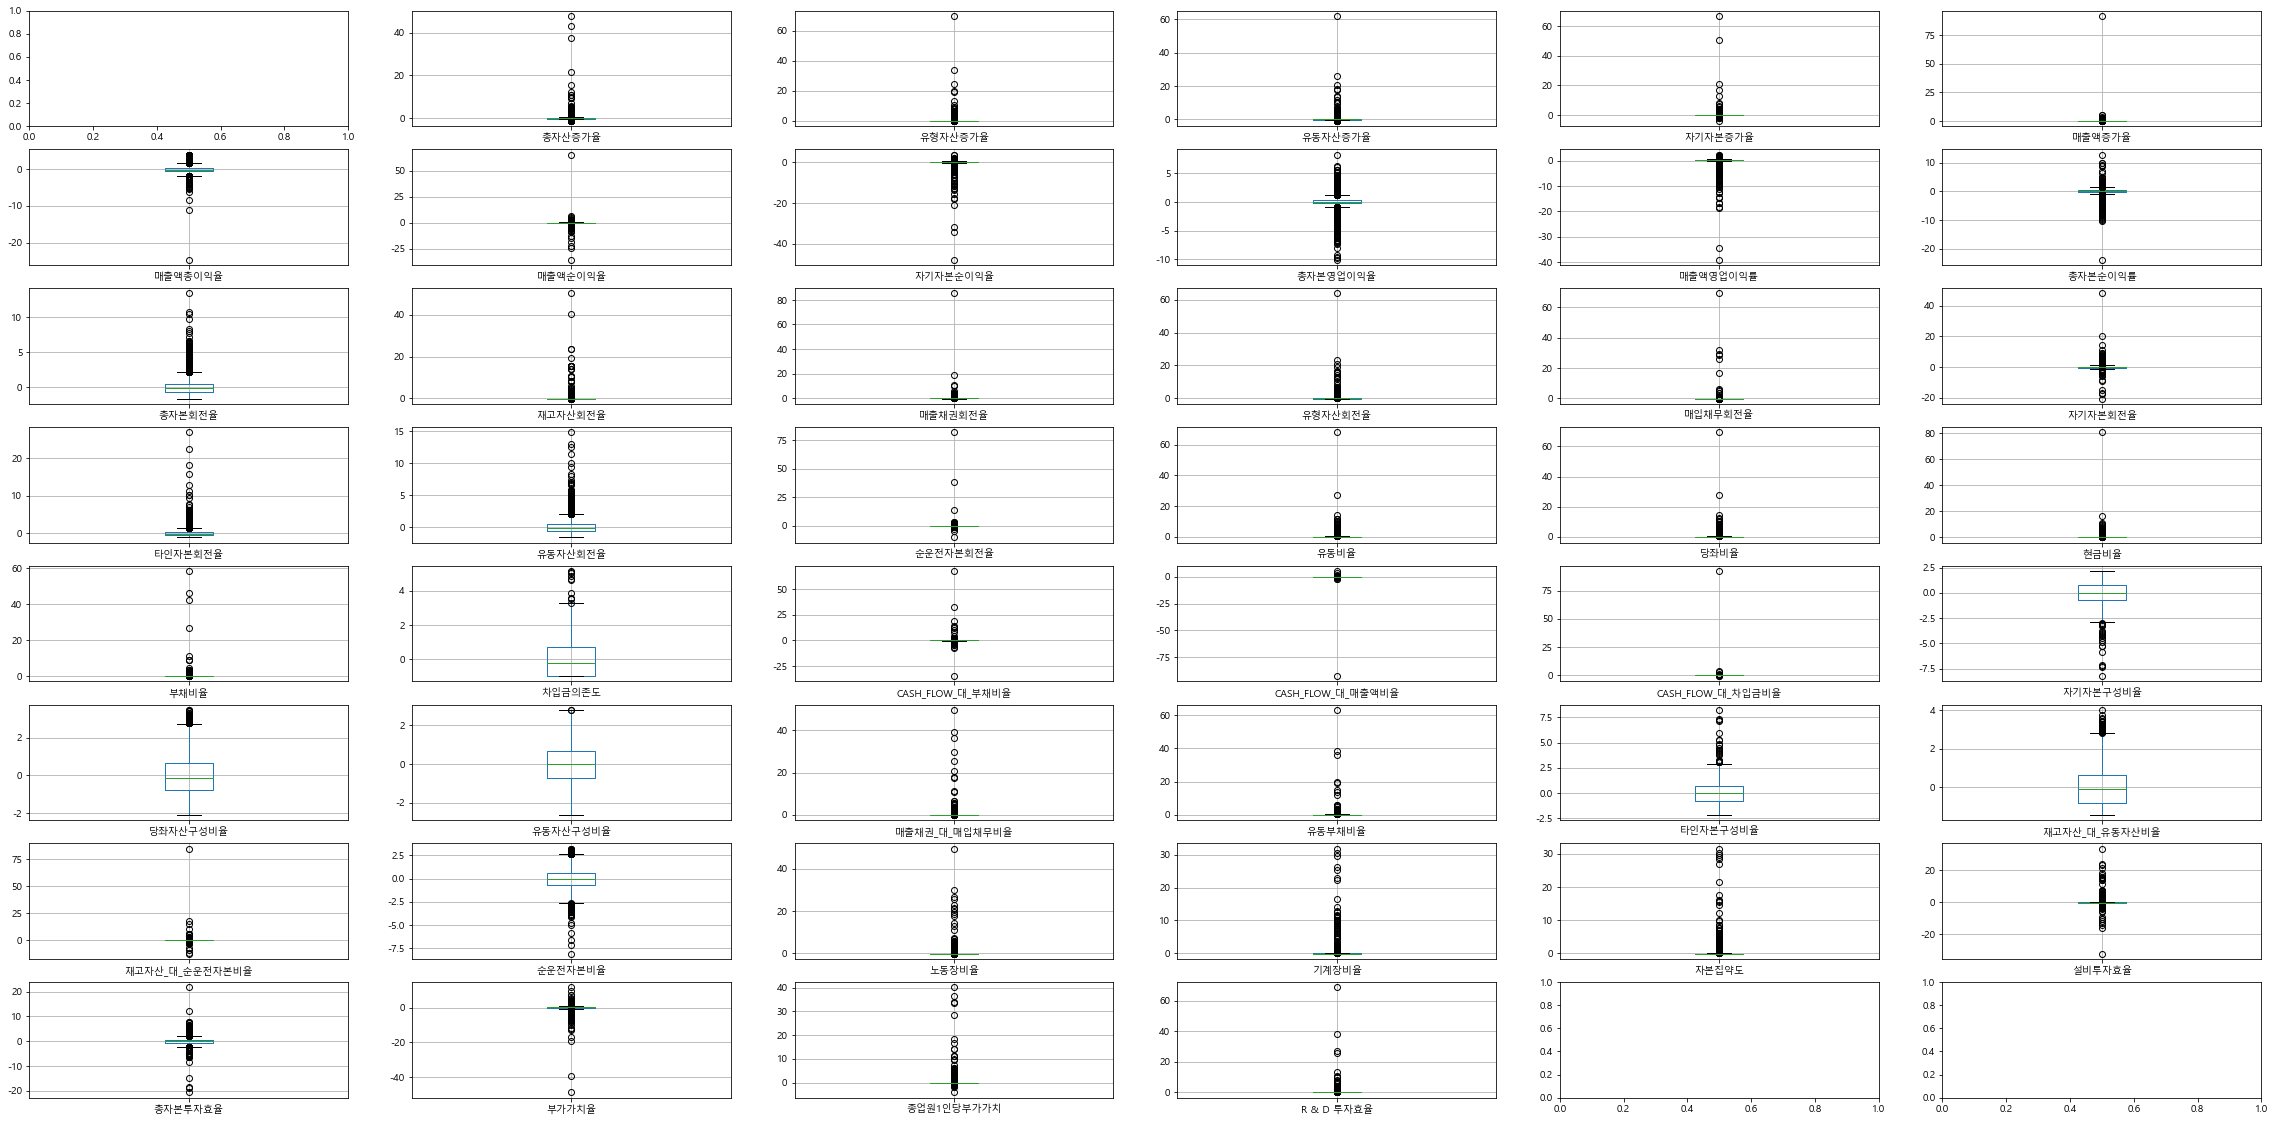

In [18]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

# ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
ss_sc2.boxplot(column='R & D 투자효율', ax=axes[7,3])
plt.show()

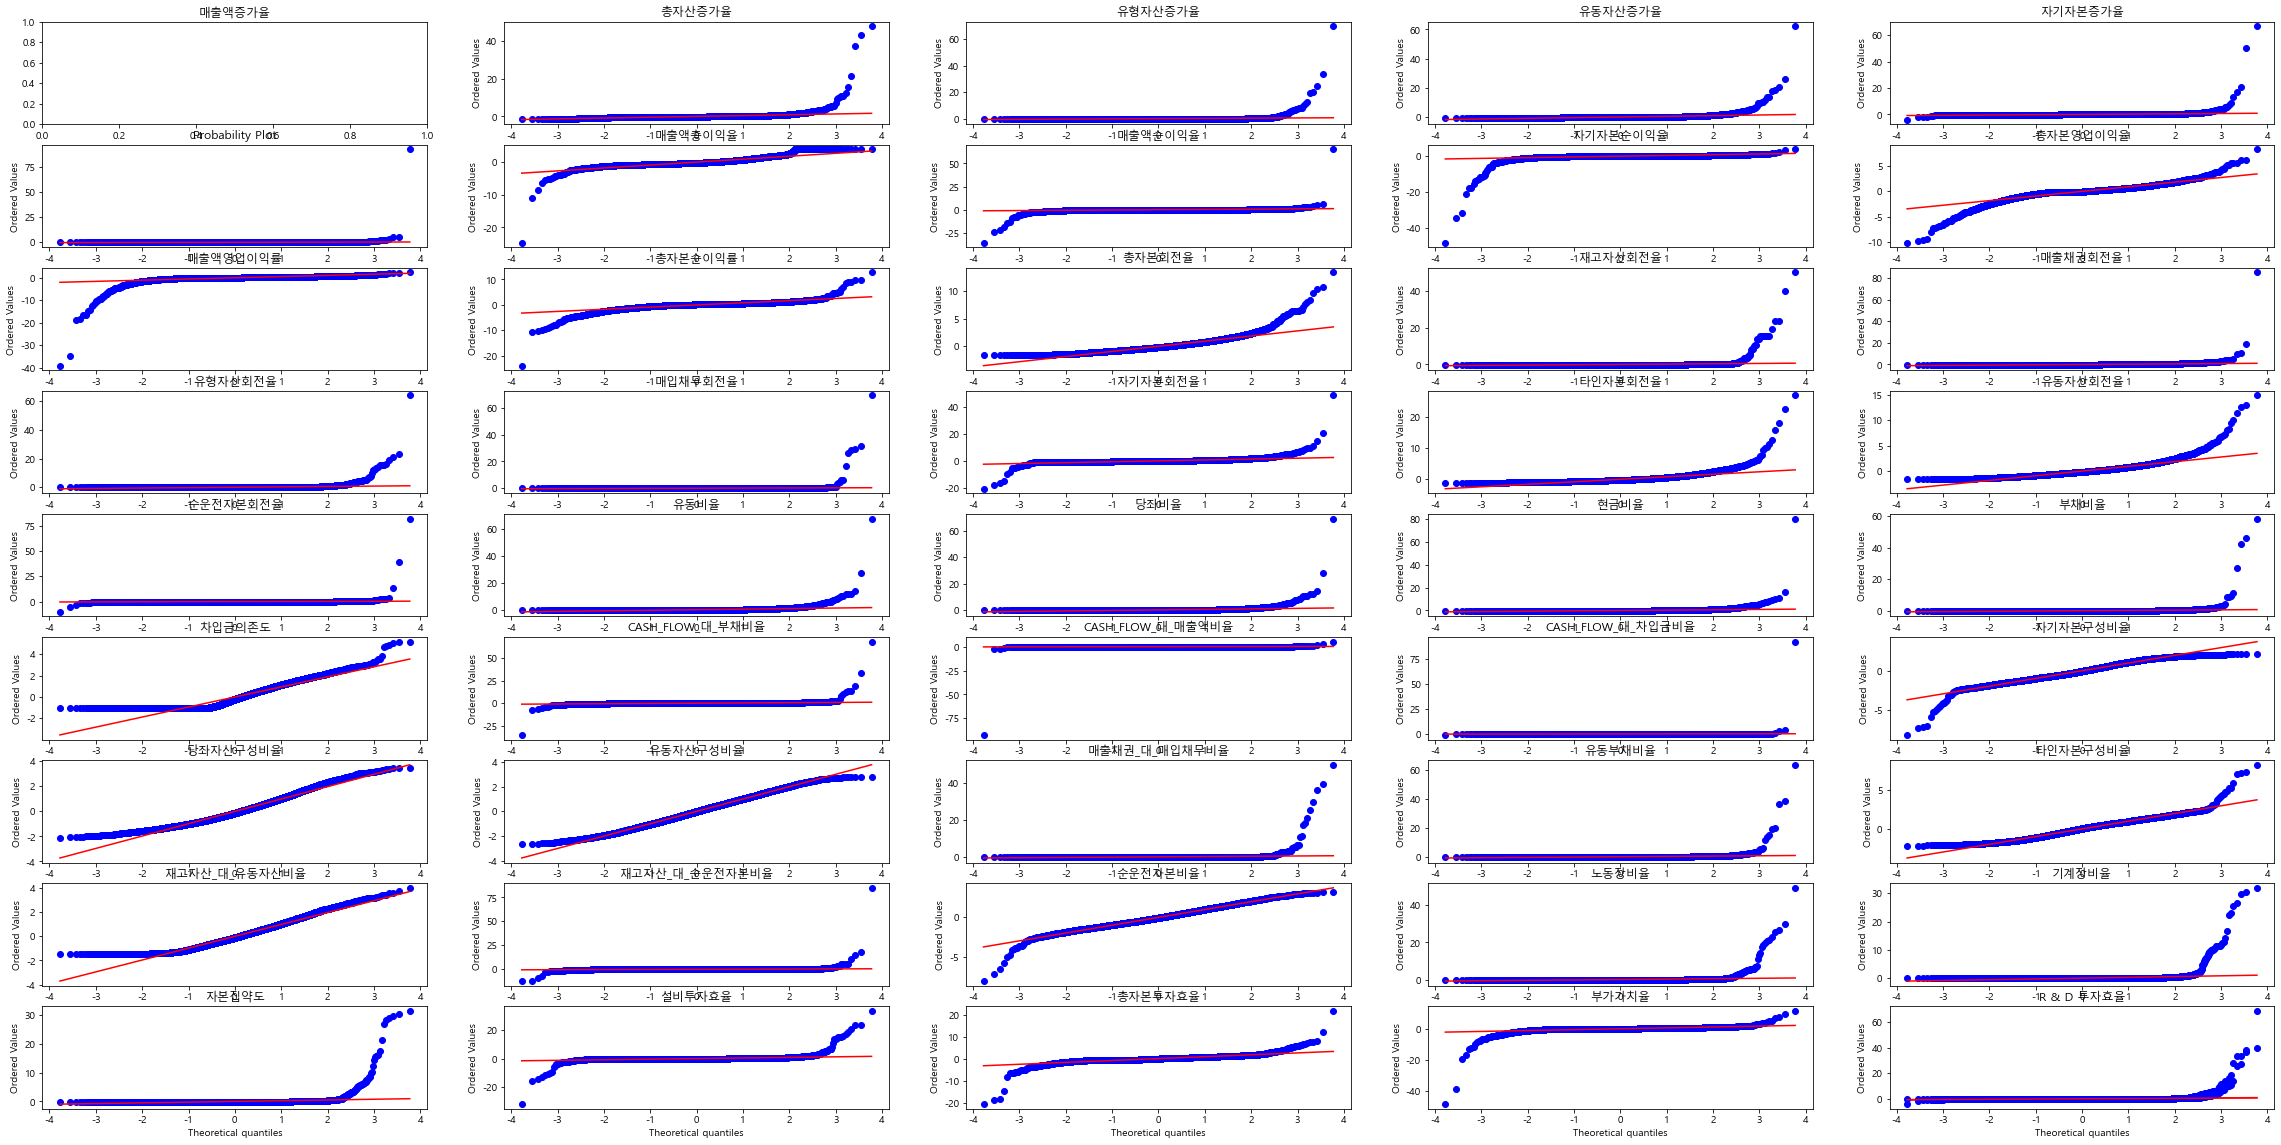

In [19]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

# stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# axes[0,0].title.set_text("이자보상배율")
stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")
stats.probplot(ss_sc2['R & D 투자효율'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("R & D 투자효율")

plt.show()

### 이상치 조정

In [20]:
from scipy.stats.mstats import winsorize
ss_sc3 = ss_sc2.copy()
for col in ss_sc3.columns:
     ss_sc3[col] = winsorize(ss_sc3[col], limits= 0.025)

### 샤피로

In [21]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [22]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
매출액영업이익률 의 pvalue: 0.0
총자본순이익률 의 pvalue: 0.0
총자본회전율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 8.800551974959623e-35
당좌자산구성비율 의 pvalue: 4.7826316587406007e-42
유동자산구성비율 의 pvalue: 4.702640404672505e-28
매출채권_대_매입채무비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 8.807071721214989e-35
재고자산_대_유동자산비율 의 pvalue: 2.4802982818549262e-43
재고자산_대_순운전자본비율 의 pvalue: 0.0
순운전자본비율 의 pvalue: 4.79653635058681e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 상관분석 및 다중공선성 확인

In [23]:
ss_sc3_corr = ss_sc3.corr(method='pearson')

In [24]:
mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))

C:\Users\82104\AppData\Local\Temp\ipykernel_17912\78728671.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))


<AxesSubplot:>

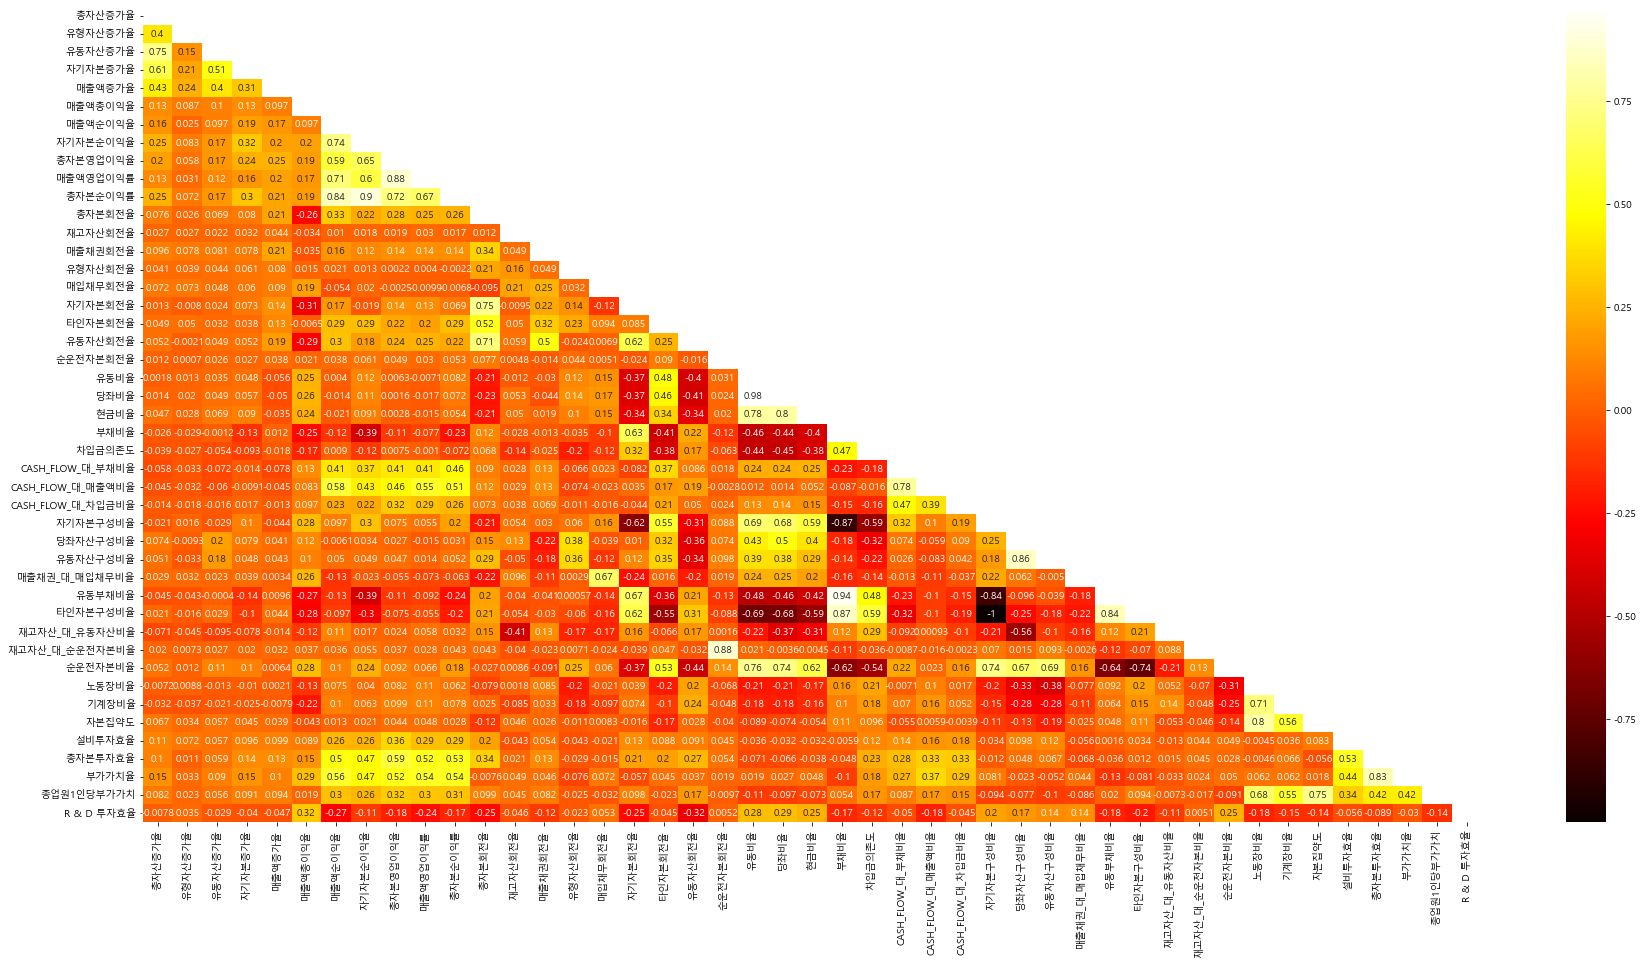

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,15))

sns.heatmap(ss_sc3.corr(),annot=True, cmap='hot',mask=mask)

In [26]:
ss_sc3 = ss_sc3.drop(['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율',
                      '자본집약도','부가가치율','매입채무회전율','CASH_FLOW_대_차입금비율','총자본회전율'],axis=1)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc3,i)for i in range(ss_sc3.shape[1])]
vif['features'] = ss_sc3.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,8.583171,노동장비율
1,8.032200,순운전자본비율
2,6.424031,당좌자산구성비율
3,6.392933,재고자산회전율
4,6.273062,매출채권_대_매입채무비율
5,6.045765,종업원1인당부가가치
6,5.884754,CASH_FLOW_대_매출액비율
7,5.688414,자기자본회전율
8,5.485213,부채비율
9,4.808613,유동자산회전율


In [28]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
당좌자산구성비율 의 pvalue: 4.7826316587406007e-42
매출채권_대_매입채무비율 의 pvalue: 0.0
재고자산_대_유동자산비율 의 pvalue: 2.4802982818549262e-43
순운전자본비율 의 pvalue: 4.79653635058681e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.0
설비투자효율 의 pvalue: 0.0
총자본투자효율 의 pvalue: 2.5773241875247765e-40
종업원1인당부가가치 의 pvalue: 0.0
R & D 투자효율 의 pvalue: 0.0


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
q1 = df.iloc[:,50:56]
ss_sc4 = pd.concat([ss_sc3,q1],axis=1)
ss_sc4

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,재고자산회전율,...,설비투자효율,총자본투자효율,종업원1인당부가가치,R & D 투자효율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부
0,-0.091037,-0.058403,0.039991,-0.066479,0.015810,1.045160,0.002281,0.019470,0.227282,-0.060878,...,-0.015001,0.069992,-0.089653,-0.070939,1,0,0,0,0,0
1,0.963670,-0.056915,1.117724,0.218792,-0.026241,0.382054,-0.251687,-0.179957,-1.464140,-0.060746,...,-0.163233,-0.635439,-0.096053,-0.061487,0,0,0,0,1,1
2,-0.139973,-0.040023,-0.278559,0.144619,-0.004226,0.891304,0.080106,0.116390,0.094218,-0.061045,...,0.158855,0.057899,-0.082712,-0.062727,0,0,0,0,0,0
3,-0.068433,0.008629,-0.339949,-0.058977,-0.013301,0.811180,0.074162,0.111877,0.009167,-0.061159,...,-0.006963,0.037744,-0.084973,-0.065051,0,0,0,1,0,0
4,-0.146586,-0.057960,-0.176358,-0.075570,-0.008546,0.771365,-0.036827,0.026562,-0.713768,-0.061037,...,-0.163233,-0.223122,-0.089128,-0.025230,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.049759,-0.015701,-0.233127,-0.030335,-0.016122,-0.735246,0.086129,0.230610,0.319193,-0.040919,...,-0.047999,0.137368,-0.064361,-0.072954,0,0,0,0,0,0
8588,0.148833,-0.012216,-0.211326,-0.046485,-0.019203,-0.706245,0.078464,0.174843,0.306846,-0.037955,...,-0.074380,0.092450,-0.062135,-0.072954,0,0,0,0,0,0
8589,0.138613,-0.021008,-0.332537,-0.017548,-0.021798,-0.790300,0.052652,0.007436,-0.005923,-0.041855,...,-0.097866,-0.030208,-0.066424,-0.072954,0,1,0,0,0,1
8590,-0.252273,-0.067262,0.002058,-0.204181,-0.020410,-0.908273,0.000013,-0.402164,-0.296743,-0.045936,...,-0.128716,-0.349811,-0.083092,-0.072954,0,0,0,0,0,0


### 회귀분석

In [48]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y
feature = ss_sc4

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
# feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  회생기업1   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              18.86
Date:                Mon, 03 Oct 2022   Prob (F-statistic):                   1.17e-117
Time:                        17:27:52   Log-Likelihood:                          1726.9
No. Observations:                8592   AIC:                                     -3380.
Df Residuals:                    8555   BIC:                                     -3119.
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
총자산증가율               -0.0151      0.014     -1.062      0.288      -0.043       0.013
유형자산증가율              -0.1850      0.062     -2.989      0.003      -0.306      -0.064
유동자산증가율              -0.0060      0.012     -0.525      0.600      -0.029       0.017
자기자본증가율               0.0008      0.026      0.032      0.975      -0.050       0.051
매출액증가율                0.6925      0.116      5.955      0.000       0.465       0.920
매출액총이익율               0.0055      0.003      1.649      0.099      -0.001       0.012
매출액순이익율              -0.0038      0.022     -0.169      0.866      -0.048       0.040
자기자본순이익율              0.0250      0.016      1.517      0.129      -0.007       0.057
총자본영업이익율              0.0154      0.004      3.648      0.000       0.007       0.024
재고자산회전율              -0.1127      0.094     -1.193      0.233      -0.298       0.073
매출채권회전율              -0.0148      0.013     -1.162      0.245      -0.040       0.010
유형자산회전율              -0.0139      0.016     -0.880      0.379      -0.045       0.017
자기자본회전율               0.0100      0.010      1.038      0.299      -0.009       0.029
타인자본회전율               0.0081      0.005      1.542      0.123      -0.002       0.018
유동자산회전율              -0.0027      0.006     -0.480      0.632      -0.014       0.008
순운전자본회전율             -0.2612      0.135     -1.940      0.052      -0.525       0.003
유동비율                 -0.0067      0.011     -0.588      0.556      -0.029       0.016
부채비율                 -0.0085      0.057     -0.149      0.882      -0.120       0.103
차입금의존도                0.0014      0.003      0.451      0.652      -0.005       0.007
CASH_FLOW_대_부채비율     -0.0724      0.026     -2.778      0.005      -0.123      -0.021
CASH_FLOW_대_매출액비율     0.2334      0.310      0.754      0.451      -0.374       0.840
당좌자산구성비율             -0.0018      0.006     -0.319      0.750      -0.013       0.009
매출채권_대_매입채무비율        -0.2180      0.107     -2.029      0.042      -0.429      -0.007
재고자산_대_유동자산비율        -0.0021      0.004     -0.565      0.572      -0.009       0.005
순운전자본비율               0.0038      0.006      0.593      0.553      -0.009       0.017
노동장비율                -0.0953      0.078     -1.217      0.224      -0.249       0.058
기계장비율                 0.0221      0.033      0.664      0.507      -0.043       0.087
설비투자효율               -0.0306      0.013     -2.434      0.015      -0.055      -0.006
총자본투자효율              -0.0019      0.005     -0.357      0.721      -0.012       0.008
종업원1인당부가가치            0.0655      0.060      1.093      0.275      -0.052       0.183
R & D 투자효율           -0.0635      0.039     -1.615      0.106      -0.141       0.014
매출원가감소율여부             0.0278      0.030      0.936      0.34

다행히 다중공선성은 사라졌군...

### 후진제거법

In [56]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(40,25))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(ss_sc4,y)

                            OLS Regression Results                            
Dep. Variable:                  회생기업1   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     41.90
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           1.77e-58
Time:                        17:40:50   Log-Likelihood:                 1720.3
No. Observations:                8592   AIC:                            -3425.
Df Residuals:                    8584   BIC:                            -3368.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0347      0.004  

In [32]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['총자산증가율', '유형자산증가율', '매출액증가율', '자기자본순이익율', '총자본영업이익율',
       'CASH_FLOW_대_부채비율', '배당금감소율여부']])

,VIF Factor,features
0,1.909862,총자본영업이익율
1,1.590612,자기자본순이익율
2,1.484167,총자산증가율
3,1.342490,매출액증가율
4,1.279616,CASH_FLOW_대_부채비율
5,1.251933,유형자산증가율
6,1.037180,배당금감소율여부


### 또다른 후진제거법

In [52]:
# 반복적 변수 제거를 하여 변수별 중요도를 도출
from sklearn.feature_selection import RFE

# 회귀용 가상 데이터 생성
from sklearn.datasets import make_regression
# n_samples: 표본 데이터 수 , n_features: 독립변수 수, n_informative: 독립변수중 종속변수와 상관관계 있는 성분 수
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=8, step=1)
model = rfe.fit(ss_sc4,y)
# 선택될 변수
print(model.support_)

# 변수 중요도(숫자 높을수록 불필요하다)
print(model.ranking_)

[False  True False False  True False False False False False False False
 False False False  True False False False False  True False False False
 False  True False False False  True  True False  True False False False
 False]
[ 7  1 22 21  1 19  8  3 12 16 13 17 18 15 26  1 23 20 28  5  1 30  2 29
 24  1 10  9 27  1  1  6  1 11 14  4 25]


In [54]:
ss_sc4.columns

Index(['총자산증가율', '유형자산증가율', '유동자산증가율', '자기자본증가율', '매출액증가율', '매출액총이익율',
       '매출액순이익율', '자기자본순이익율', '총자본영업이익율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '부채비율', '차입금의존도',
       'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', '당좌자산구성비율', '매출채권_대_매입채무비율',
       '재고자산_대_유동자산비율', '순운전자본비율', '노동장비율', '기계장비율', '설비투자효율', '총자본투자효율',
       '종업원1인당부가가치', 'R & D 투자효율', '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부',
       '자본증가율여부', '투자활동감소율여부'],
      dtype='object')

In [57]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['유형자산증가율', '매출액증가율', '순운전자본회전율', '자기자본순이익율', 'CASH_FLOW_대_매출액비율',
       '노동장비율', '종업원1인당부가가치','R & D 투자효율','배당금감소율여부']])

,VIF Factor,features
0,2.771439,노동장비율
1,2.749391,종업원1인당부가가치
2,1.364694,자기자본순이익율
3,1.261750,CASH_FLOW_대_매출액비율
4,1.141626,매출액증가율
5,1.107448,유형자산증가율
6,1.103940,R & D 투자효율
7,1.085337,배당금감소율여부
8,1.009523,순운전자본회전율


In [68]:
#변수 선택법
def processSubset(x,y):
    model = sm.OLS(y,x)  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(ss_sc4,y))
 
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel
 
print(getBest(x,y,k=2))
 
#변수 선택에 따른 학습시간과 저장 K 반복
 
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(ss_sc4,y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027CB5B672E0>, 'AIC': -3379.854292702341}
Processed 37 models on 1 predictors in 0.9352080821990967 seconds.
Processed 666 models on 2 predictors in 15.79414415359497 seconds.
Processed 7770 models on 3 predictors in 233.83695697784424 seconds.


In [69]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(ss_sc4,y)
 
print(forwordBestModel.summary())

TypeError: processSubset() got an unexpected keyword argument 'feature_set'

In [ ]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(ss_sc4,y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(ss_sc4,y)
 
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(ss_sc4,y)


### 릿지

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc4, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.042 -0.04  -0.037 -0.037 -0.042]
 5 folds 의 개별 RMSE scores :  [0.206 0.2   0.192 0.191 0.205]
 5 folds 의 평균 RMSE : 0.199 


In [34]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0,1,2,3,4,5]
coeff_lasso_df =get_linear_reg_eval('Ridge', params=lasso_alphas, X_data_n=ss_sc4, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 93602105240.245 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 2일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 4일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 5일 때 5 폴드 세트의 평균 RMSE: 0.199 


,alpha:0,alpha:1,alpha:2,alpha:3,alpha:4,alpha:5
매출액증가율,0.724612,0.536845,0.426297,0.353539,0.302027,0.263643
배당금감소율여부,0.083977,0.083667,0.083451,0.083276,0.083126,0.082991
종업원1인당부가가치,0.060332,0.055719,0.051294,0.047585,0.044495,0.041896
재고자산회전율,0.057117,0.044988,0.037290,0.031878,0.027856,0.024747
기계장비율,0.025581,0.024358,0.023396,0.022576,0.021880,0.021285
자기자본순이익율,0.022841,0.022873,0.022703,0.022511,0.022320,0.022139
매출원가감소율여부,0.021260,0.020666,0.020102,0.019591,0.019123,0.018689
변화율여부,0.018014,0.017344,0.016923,0.016598,0.016325,0.016085
총자본영업이익율,0.015289,0.016097,0.016584,0.016901,0.017121,0.017281
부채비율,0.013572,0.015369,0.015419,0.014945,0.014288,0.013579


진짜 릿지는 못 써먹겠다....ㅂㄷㅂㄷ

### 라쏘

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc4, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.043 -0.041 -0.037 -0.037 -0.043]
 5 folds 의 개별 RMSE scores :  [0.208 0.203 0.194 0.194 0.208]
 5 folds 의 평균 RMSE : 0.201 


In [39]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.0005,0.0006,0.0007,0.0008,0.001]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_sc4, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.0005일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.0006일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.199 


,alpha:0.0005,alpha:0.0006,alpha:0.0007,alpha:0.0008,alpha:0.001
배당금감소율여부,0.078873,0.077930,0.076968,0.076051,0.074191
총자본영업이익율,0.018592,0.018372,0.018138,0.018016,0.017571
자기자본순이익율,0.009638,0.006754,0.003907,0.001192,0.000000
자기자본회전율,0.006852,0.006521,0.006087,0.005736,0.005407
타인자본회전율,0.003545,0.003120,0.002771,0.002390,0.001806
직원감소율여부,0.002584,0.001331,0.000087,0.000000,0.000000
매출액총이익율,0.002504,0.002249,0.002006,0.001770,0.001245
재고자산_대_유동자산비율,0.001556,0.001500,0.001423,0.001375,0.001124
당좌자산구성비율,0.001427,0.001261,0.001126,0.001031,0.000712
유동자산회전율,0.001177,0.001205,0.001246,0.001281,0.001082


일단 0.007로 선택 했습니다

In [40]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['배당금감소율여부', '총자본영업이익율', '자기자본순이익율', '자기자본회전율', '타인자본회전율',
         '직원감소율여부','매출액총이익율', '재고자산_대_유동자산비율','당좌자산구성비율',
         '유동자산회전율','설비투자효율','CASH_FLOW_대_부채비율']])

,VIF Factor,features
0,7.433599,유동자산회전율
1,5.823556,당좌자산구성비율
2,5.613294,자기자본회전율
3,4.987508,타인자본회전율
4,2.870291,재고자산_대_유동자산비율
5,2.798069,매출액총이익율
6,2.127553,총자본영업이익율
7,1.941848,자기자본순이익율
8,1.669313,설비투자효율
9,1.596044,CASH_FLOW_대_부채비율


12개 선정입니다

### 엘라스틱

In [45]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.0005,0.0006,0.0007,0.0008,0.1]
coeff_lasso_df =get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=ss_sc4, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.0005일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.0006일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.201 


,alpha:0.0005,alpha:0.0006,alpha:0.0007,alpha:0.0008,alpha:0.1
배당금감소율여부,0.080157,0.079491,0.078816,0.078141,0.0
총자본영업이익율,0.018870,0.018732,0.018582,0.018431,0.0
자기자본순이익율,0.014050,0.011898,0.009867,0.007849,0.0
자기자본회전율,0.007189,0.007065,0.006870,0.006667,0.0
타인자본회전율,0.004567,0.003925,0.003566,0.003248,0.0
직원감소율여부,0.004483,0.003587,0.002709,0.001830,0.0
매출액총이익율,0.002954,0.002716,0.002527,0.002343,0.0
당좌자산구성비율,0.001748,0.001584,0.001456,0.001331,0.0
재고자산_대_유동자산비율,0.001622,0.001604,0.001572,0.001539,0.0
유동자산회전율,0.000906,0.001143,0.001189,0.001205,0.0


일단 여기도 0.0007로 선정 합니다

In [46]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['배당금감소율여부', '총자본영업이익율','자기자본순이익율', '자기자본회전율', '타인자본회전율', '직원감소율여부',
         '매출액총이익율','당좌자산구성비율', '재고자산_대_유동자산비율','유동자산회전율','차입금의존도',
         '설비투자효율','CASH_FLOW_대_부채비율']])

,VIF Factor,features
0,7.735396,유동자산회전율
1,5.965900,당좌자산구성비율
2,5.749396,자기자본회전율
3,5.713920,타인자본회전율
4,3.326110,재고자산_대_유동자산비율
5,2.891612,차입금의존도
6,2.799275,매출액총이익율
7,2.129200,총자본영업이익율
8,1.961694,자기자본순이익율
9,1.707071,설비투자효율


13개 선정입니다

3개 공통을 추출한 결과 자기자본순이익율,CASH_FLOW_대_매출액비율 이렇게 2개 나왔네용;; 좀 더 늘리고 봐야되나...

In [44]:
# from numpy import arange

# from pandas import read_csv

# from sklearn.linear_model import LassoCV,RidgeCV

# from sklearn.model_selection import RepeatedKFold

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define model

# model = RidgeCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=1)

# # fit model

# model.fit(ss_sc4, y)

# # summarize chosen configuration

# print('alpha: %f' % model.alpha_)